# ML Project: Classification 

## Predict what feature has more influence over income 


$50K/yr based on census data

Authors:
`Andrea Murphy` and `Josh Quigley`

## Setup

In [1]:
import numpy as np
import pandas as pd

In [3]:
import pylab as plot
params = { 
    "axes.labelsize": "large",
    "xtick.labelsize" : "x-large",
    "legend.fontsize": 20,
    "figure.dpi": 150,
    "figure.figsize" : [25, 7]
}
plot.rcParams.update(params)

In [4]:
# Importing the data itself
data_set  = pd.read_csv('adult.csv')

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data_set.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Find out how many unique categories we have for `occupation`

In [7]:
occupation_set = set(data_set['occupation'])
print(occupation_set)

{'Farming-fishing', 'Handlers-cleaners', 'Armed-Forces', 'Machine-op-inspct', 'Priv-house-serv', 'Craft-repair', 'Transport-moving', 'Other-service', 'Prof-specialty', 'Tech-support', 'Exec-managerial', '?', 'Protective-serv', 'Sales', 'Adm-clerical'}


### Classify the features as numbers instead of their names

In [8]:
data_set['occupation'] = data_set['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)

In [9]:
data_set.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,0,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,7,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,0,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,6,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,5,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
# Again, let's see how many unique categories we have in this property
income_set = set(data_set['income'])
print(income_set)

{'<=50K', '>50K'}


In [11]:
# As expected. Just transforming now.
data_set['income'] = data_set['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [12]:
data_set.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,0,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,7,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,0,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,6,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,5,Own-child,White,Female,0,3900,40,United-States,0


In [13]:
# Importing matlab to plot graphs
import matplotlib as plt
%matplotlib inline

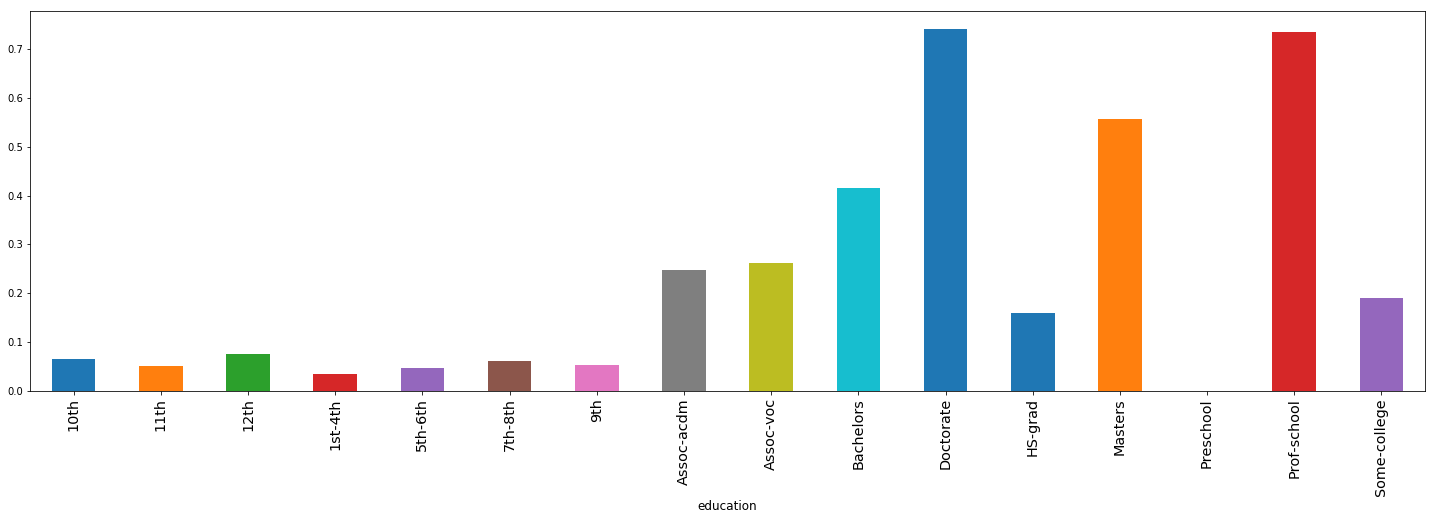

In [18]:
data_set.groupby('education').income.mean().plot(kind='bar',
                                                figsize=(25, 7),
                                                    stacked=True,)

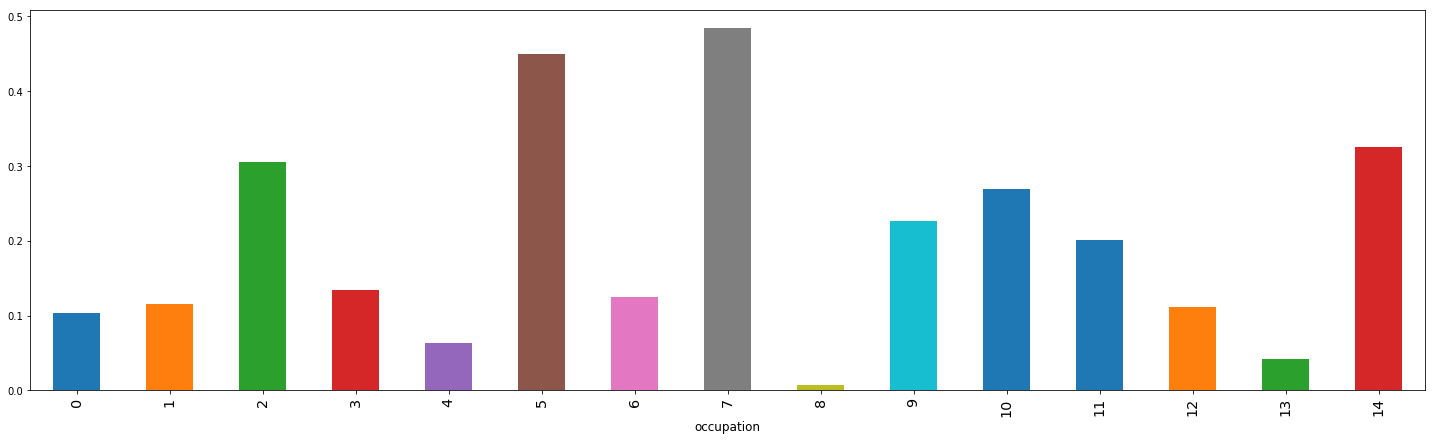

In [16]:
data_set.groupby('occupation').income.mean().plot(kind='bar',
                                                  figsize=(25, 7),
                                                    stacked=True,)

## The higher the education and the higher the job title, the higher is the income

# Create a Support Vector Machine for Education and Occupation

In [22]:
from sklearn.model_selection import train_test_split

# Only the features that are important
X = data_set[['education.num', 'occupation']]

# Taking the labels (Income)
Y = data_set['income']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [20]:
from sklearn.svm import SVC

classifier = SVC()

# Fitting the data
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7871948410870566


## Convert the categorical features `Sex` into 0 and 1 

In [23]:
data_set['sex'] = data_set['sex'].map({'Male': 0, 'Female': 1}).astype(int)

### Find out how many unique categories we have 

In [24]:
race_set = set(data_set['race'])
print(race_set)

{'Asian-Pac-Islander', 'White', 'Amer-Indian-Eskimo', 'Black', 'Other'}


In [26]:
mstatus_set = set(data_set['marital.status'])
print(mstatus_set)

{'Widowed', 'Married-civ-spouse', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse', 'Divorced', 'Never-married'}


### Classify the features as numbers instead of their names

In [25]:
data_set['race'] = data_set['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [27]:
data_set['marital.status'] = data_set['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [28]:
data_set.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,1,0,Not-in-family,3,1,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,1,7,Not-in-family,3,1,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,1,0,Unmarried,0,1,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,4,6,Unmarried,3,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,3,5,Own-child,3,1,0,3900,40,United-States,0


# Create a Correlation Matrix

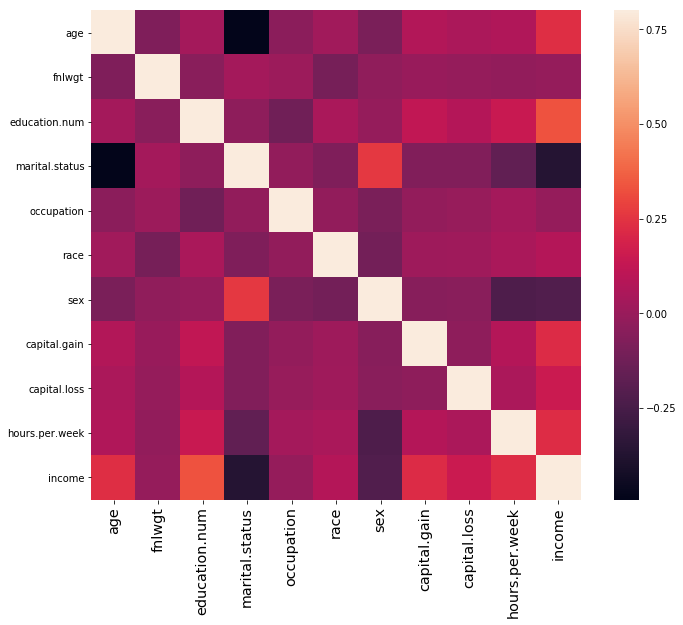

In [33]:
import seaborn as sns
import matplotlib.pyplot as pplt

#correlation matrix
corrmat = data_set.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, color='mediumvioletred');


# Create a Support Vector Machine for Education and Age

In [34]:
X = data_set[['education.num', 'age']]

# Taking the labels (Income)
Y = data_set['income']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [35]:
classifier = SVC()
classifier.fit(X_train, Y_train)

score = classifier.score(x_test, y_test)

print(score)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7885766927683096


# Create a Support Vector Machine
combining Education, age, hours.per.week, and capital.gain with income

In [37]:
X = data_set[['education.num', 'age', 'hours.per.week', 'capital.gain']]
Y = data_set['income']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [38]:
classifier = SVC()

classifier.fit(X_train, Y_train)
score = classifier.score(x_test, y_test)

print(score)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8023952095808383


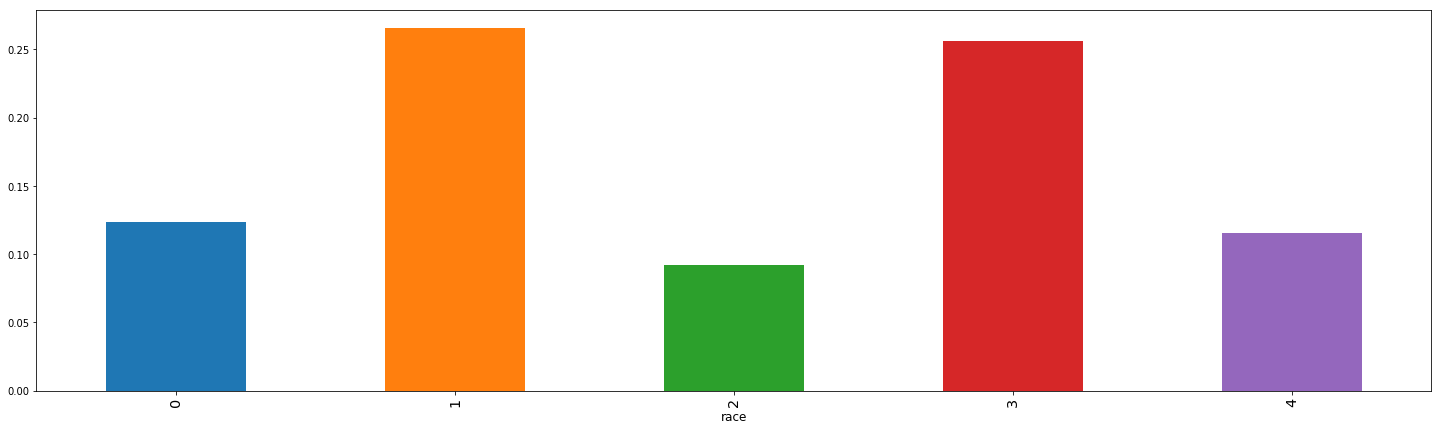

In [42]:
data_set.groupby('race').income.mean().plot(kind='bar',
                                            figsize=(25,7),
                                                    stacked=True)

- Black: 0
- Asian-Pac-Islander: 1
- Other: 2
- White: 3
- Amer-Indian-Eskimo: 4

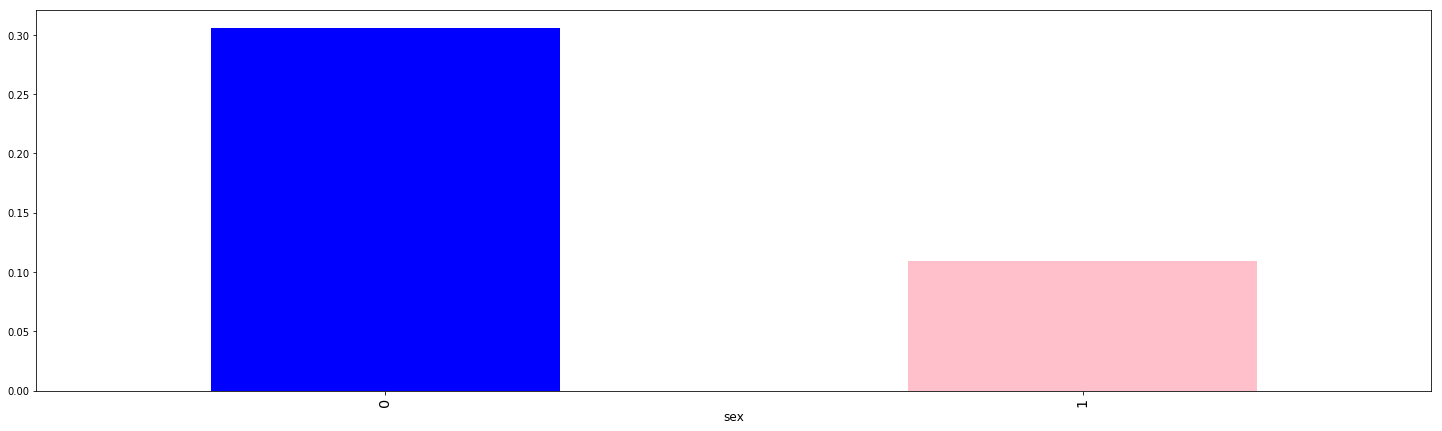

In [50]:
data_set.groupby('sex').income.mean().plot(kind='bar',
                                          figsize=(25, 7),
                                                    stacked=True, color=['b', 'pink']);

- Male: 0 
- Female: 1  

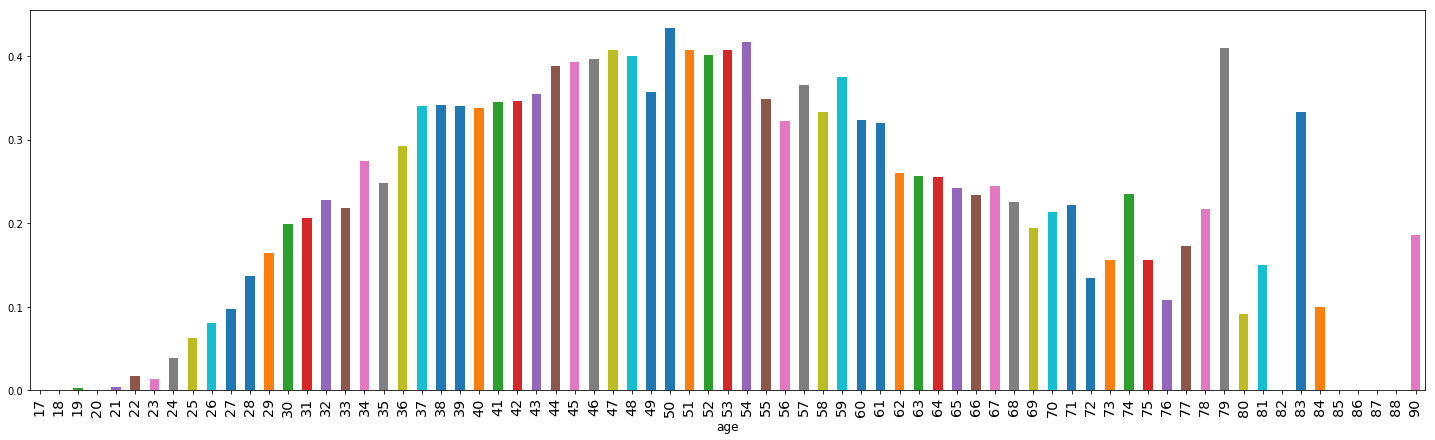

In [63]:
data_set.groupby('age').income.mean().plot(kind='bar',
                                              figsize=(25, 7))